
COLOR PALETTE IMDB:
Arancione = #deb522
Nero = 	#0c0b00
Azzurro = #128bb5
Arancione chiaro = #f2db83

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Understanding & Preparation

## Data Semantics
 • Introduce the variables with their meaning and characteristics;

In [76]:
df = pd.read_csv('train.csv')

In [77]:
df.head()

originalTitle  rating  startYear endYear  \
0  Neogenic Nightmare Chapter 3: Hydro-Man  (7, 8]       1995      \N   
1                                  Looping  (5, 6]       1982      \N   
2                           Idealnaya para  (5, 6]       1992      \N   
3              MasterChef Celebrity México  (5, 6]       2021      \N   
4                              Seutateueob  (7, 8]       2020    2020   

  runtimeMinutes  awardWins  numVotes  worstRating  bestRating  totalImages  \
0             \N        0.0       779            1          10            1   
1             \N        0.0        11            1          10            1   
2             \N        0.0        38            1          10            1   
3             \N        0.0        15            1          10           22   
4             80        1.0     15718            1          10          347   

   ...  titleType  awardNominationsExcludeWins  canHaveEpisodes isRatable  \
0  ...  tvEpisode                            0            False      True   
1  ...  videoGame                            0            False      True   
2  ...      movie                            0            False      True   
3  ...   tvSeries                            0             True      True   
4  ...   tvSeries                            1             True      True   

   isAdult  numRegions  userReviewsTotal  ratingCount  countryOfOrigin  \
0        0           1                 0          781           ['US']   
1        0           1                 0           11          ['XWG']   
2        0           1                 1           38           ['RU']   
3        0           1                 0           15           ['MX']   
4        0          32               452        15746           ['KR']   

                       genres  
0  Action,Adventure,Animation  
1                      Action  
2                      Comedy  
3                  Reality-TV  
4        Comedy,Drama,Romance  

[5 rows x 23 columns]

It's analyzed a dataset about films and tv series. There are 23 variables:
- originalTitle: 		Original title, in the original language.
- runtimeMinutes: 		Primary runtime of the title, in minutes.
- isAdult: 			Whether or not the title is for adult. 0: non-adult title; 1: adult title.
- startYear: 			Represents the release year of a title. In the case of TV Series, it is the series start year.
- endYear: 			TV Series end year.
- numVotes: 			Number of votes the title has received.
- numRegions: 	 		The regions number for this version of the title.
- worstRating: 			Worst title rating.
- bestRating: 			Best title rating.
- canHaveEpisodes:		Whether or not the title can have episodes.
- isRatable: 			Whether or not the title can be rated by users.
- totalImages:			Total Number of Images for the title within the IMDb title page.
- totalVideos: 			Total Number of Videos for the title within the IMDb title page.
- totalCredits:			Total Number of Credits for the title.
- criticReviewsTotal:		Total Number of Critic Reviews.
- awardWins:			Number of awards the title won.
- awardNominationsExcludeWins: 	Number of award nominations excluding wins.
- titleType:			The type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc).
- rating:			IMDB title rating class.
- ratingCount: 			The total number of user ratings submitted for the title.
- countryOfOrigin: 		The country where the title was primarily produced.
- genres: 			The genre(s) associated with the title (e.g., drama, comedy, action).
- userReviewsTotal  		Total Number of Users Reviews.

We've chosen the following variables: (non le sceglierei da qua le variabili)


*   numVotes
*   awardWins
*   rating
*   numRegions


### Type delle variabili

In [78]:
df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                         object
runtimeMinutes                  object
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                          int64
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

Analyzing the variables it can be seen that there are 4 types of variables:
- object
- integers(int64)
- floats (float64)
- booleans (bool)

It's noted that endYear is tipe object and it should be int64, award wins should be int

In [79]:
#le variabili sono state trasformate in float e non in int a causa dei valori mancanti del dataframe, che non possono essere convertiti in int
#i valori non convertibili vengono sostituiti con NaN, che è un valore di tipo float

df['endYear'] = pd.to_numeric(df['endYear'], errors='coerce')
df['awardWins'] = pd.to_numeric(df['awardWins'], errors='coerce')
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')
df['isAdult'] = df['isAdult'].astype(bool)

df.dtypes

originalTitle                   object
rating                          object
startYear                        int64
endYear                        float64
runtimeMinutes                 float64
awardWins                      float64
numVotes                         int64
worstRating                      int64
bestRating                       int64
totalImages                      int64
totalVideos                      int64
totalCredits                     int64
criticReviewsTotal               int64
titleType                       object
awardNominationsExcludeWins      int64
canHaveEpisodes                   bool
isRatable                         bool
isAdult                           bool
numRegions                       int64
userReviewsTotal                 int64
ratingCount                      int64
countryOfOrigin                 object
genres                          object
dtype: object

In [80]:
df_copy = df.copy()
df_copy.rename(columns={'awardNominationsExcludeWins':'AwNmExWins'},inplace=True)

In [81]:
'''
#4min e 46sec di elaborazione, runnare la cella con cautela
import seaborn as sns

sns.pairplot(df_copy)
plt.show()
'''

'\n#4min e 46sec di elaborazione, runnare la cella con cautela\nimport seaborn as sns\n\nsns.pairplot(df_copy)\nplt.show()\n'

## Distribution of the variables and statistics
• Explore (single, pairs of…) variables quantitatively (e.g., statistics, distributions);

In [82]:
numeric_df = df_copy.select_dtypes(include=[np.number])

# Calcolare le statistiche descrittive
desc = numeric_df.describe().round(2)

desc

startYear  endYear  runtimeMinutes  awardWins   numVotes  worstRating  \
count   16431.00   814.00        11579.00   13813.00   16431.00      16431.0   
mean     1991.87  2001.57           61.22       0.49    1492.15          1.0   
std        26.12    18.45           52.11       2.97   20137.71          0.0   
min      1878.00  1945.00            0.00       0.00       5.00          1.0   
25%      1978.00  1989.00           25.00       0.00      15.00          1.0   
50%      1997.00  2005.50           58.00       0.00      36.00          1.0   
75%      2013.00  2018.00           90.00       0.00     148.50          1.0   
max      2024.00  2025.00         3000.00     145.00  966565.00          1.0   

       bestRating  totalImages  totalVideos  totalCredits  criticReviewsTotal  \
count     16431.0     16431.00     16431.00      16431.00            16431.00   
mean         10.0        11.48         0.27         61.34                2.79   
std           0.0        74.25         3.12        174.02               15.41   
min          10.0         0.00         0.00          0.00                0.00   
25%          10.0         1.00         0.00         16.00                0.00   
50%          10.0         1.00         0.00         34.00                0.00   
75%          10.0         6.00         0.00         65.00                1.00   
max          10.0      3504.00       258.00      15742.00              533.00   

       AwNmExWins  numRegions  userReviewsTotal  ratingCount  
count    16431.00    16431.00          16431.00     16431.00  
mean         0.56        3.55              7.23      1492.92  
std          3.96        5.85             66.50     20145.39  
min          0.00        1.00              0.00         5.00  
25%          0.00        1.00              0.00        15.00  
50%          0.00        1.00              0.00        36.00  
75%          0.00        3.00              2.00       149.00  
max        197.00       69.00           5727.00    967042.00

From the general statistics it's see that for awardWins the mean is 0.49 while the median is 0. It's highlighted that at least the 75% of units never won an award as it can be see from the value of the third quartile.  
This attribute has a low std, meaning that data are distributed near the mean.  
  
For the numVotes the average is far from the median and also from the third quartile, so there are many title with a low number of votes and some units with a lot of ratings.  
In this case, there is a very high variability, the data are distributed far from the mean.  
  
Instead, for totalCredits the mean is a bit far from the median and 75% of the title have at least 65 credits.  
The value of std is high, so the data points are widely spread out from the mean. 
  
For the total of critic and user reviews it can be see that as before the median is 0 while the mean have an higher value, so at least 50% of the films have 0 reviews. The user reviews have in mean an higher value than critic ones.  
For the first features the data are distributed near the mean more than the second features where std has a high value.  
  
The statistics of ratingCount have very similar values to numVotes. These two variables differ by a few data points.

In [83]:
primo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == 966565]
secondo_Nlarge = df_copy['numVotes'].nlargest(2).iloc[-1]
secondo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == secondo_Nlarge]
terzo_Nlarge = df_copy['numVotes'].nlargest(3).iloc[-1]
terzo_large = df_copy['originalTitle'].loc[df_copy['numVotes'] == terzo_Nlarge]
print(primo_large, 966565)
print(secondo_large, secondo_Nlarge)
print(terzo_large, terzo_Nlarge)

3655    Harry Potter and the Deathly Hallows - Part 2
Name: originalTitle, dtype: object 966565
988    Il buono, il brutto, il cattivo
Name: originalTitle, dtype: object 825934
1694    Full Metal Jacket
Name: originalTitle, dtype: object 803146


From the output code it is noticed that the first 3 units for number of votes belong to the category 'movies' of the variable 'titleType'.
These are respectively:
1. Harry Potter and the Deathly Hallows - Part 2 with 966.565 votes.
2. Il buono, il brutto, il cattivo with 825.934 votes.
3. Full Metal Jacket with 803.146 votes.

In [84]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Definizione dei colori di IMDb
imdb_colors = ['#deb522', '#0c0b00', '#128bb5', '#f2db83']

# Creazione dei sottoplot con meno distanza
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('awardWins', 'totalCredits', 'numVotes', 'criticReviewsTotal'),
    vertical_spacing=0.15,  # Riduce la distanza verticale
    horizontal_spacing=0.1  # Riduce la distanza orizzontale
)

# Grafico per awardWins
fig.add_trace(go.Histogram(x=df_copy['awardWins'], nbinsx=int(50/0.9), marker_color=imdb_colors[0]), row=1, col=1)

# Grafico per totalCredits
fig.add_trace(go.Histogram(x=df_copy['totalCredits'], nbinsx=int(400/2), marker_color=imdb_colors[1]), row=1, col=2)

# Grafico per numVotes
fig.add_trace(go.Histogram(x=df_copy['numVotes'], nbinsx=int(400/2), marker_color=imdb_colors[2]), row=2, col=1)

# Grafico per criticReviewsTotal con limite sull'asse y
fig.add_trace(go.Histogram(x=df_copy['criticReviewsTotal'], nbinsx=int(400/5), marker_color=imdb_colors[3]), row=2, col=2)

# Aggiungi etichette per ogni asse
fig.update_xaxes(title_text="Number of awards win", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)

fig.update_xaxes(title_text="Total of credits", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=1, col=2)

fig.update_xaxes(title_text="Number of votes", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)

fig.update_xaxes(title_text="Critic reviews", row=2, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=2)


# Aggiornamento del layout
fig.update_layout(showlegend=False, width= 1200 ,height=800)

# Mostra il grafico
fig.show()

In these graphs it is analyzed the frequences of awardWins, totalCredits, numVotes and criticReviewsTotal. Due to the high frequences of the data and the range, in some cases, the distribution of the data is not clear enough.  
There is a need to trasform the data for a better analysis.

In [85]:
import plotly.express as px

# Raggruppa per titleType e calcola la media dei premi vinti
df_grouped = df_copy.groupby(['titleType'])['awardWins'].mean().reset_index()

# Ordina il DataFrame per awardWins in ordine decrescente
df_grouped = df_grouped.sort_values(by='awardWins', ascending=False)

# Definizione dei colori di IMDb con un giallo più tendente all'arancione
imdb_colors = ['#deb522', '#0c0b00', '#128bb5', '#f2db83']

# Crea un bar plot usando Plotly con i colori di IMDb e aumentando il font dei titoli, numeri e nomi
fig = px.bar(df_grouped, x='titleType', y='awardWins', title='Average of Award Wins by Title Type',
             color_discrete_sequence=imdb_colors)

# Aggiorna il layout per aumentare il font dei titoli, numeri e nomi
fig.update_layout(
    title_font=dict(size=14),
    xaxis_title_font=dict(size=22),
    yaxis_title_font=dict(size=22),
    xaxis_tickfont=dict(size=18),
    yaxis_tickfont=dict(size=18)
)

# Mostra il grafico
fig.show()

By this graph it can be seen the sum of award wins for each title type in the dataset. Furthermore it is highlighted how the totality of objects that have won an award are not an adult type content.

In [86]:
import plotly.express as px
import pandas as pd

# Raggruppa per rating e calcola la media dei premi vinti
df_grouped = df_copy.groupby(['rating'])['awardWins'].mean().reset_index()

# Definizione dei colori di IMDb con un giallo più tendente all'arancione
imdb_colors = ['#0c0b00']

# Crea un bar plot usando Plotly con i colori di IMDb
fig = px.bar(df_grouped, x='rating', y='awardWins',
             color_discrete_sequence=imdb_colors)

# Aggiorna il layout per aumentare il font dei titoli, numeri e nomi
fig.update_layout(
    title_font=dict(size=14),
    xaxis_title_font=dict(size=22),
    yaxis_title_font=dict(size=22),
    xaxis_tickfont=dict(size=18),
    yaxis_tickfont=dict(size=18)
)

# Mostra il grafico
fig.show()

## Assessing data quality
• Are present errors, outliers, missing values, semantic inconsistencies, etc?

### Missing Value

In [87]:
df_copy.isna().sum()

originalTitle             0
rating                    0
startYear                 0
endYear               15617
runtimeMinutes         4852
awardWins              2618
numVotes                  0
worstRating               0
bestRating                0
totalImages               0
totalVideos               0
totalCredits              0
criticReviewsTotal        0
titleType                 0
AwNmExWins                0
canHaveEpisodes           0
isRatable                 0
isAdult                   0
numRegions                0
userReviewsTotal          0
ratingCount               0
countryOfOrigin           0
genres                    0
dtype: int64

In [88]:
def variable_cleaner (variable_chosen):
    df_copy[variable_chosen] = df_copy[variable_chosen].replace('\\N', np.nan)

# Filtra i titoli con runtimeMinutes uguale a NaN
    prova = df_copy.loc[df_copy[variable_chosen].isna()]

for c in df_copy.columns:
    variable_cleaner(c)

    
df_copy.isna().sum()


originalTitle             0
rating                    0
startYear                 0
endYear               15617
runtimeMinutes         4852
awardWins              2618
numVotes                  0
worstRating               0
bestRating                0
totalImages               0
totalVideos               0
totalCredits              0
criticReviewsTotal        0
titleType                 0
AwNmExWins                0
canHaveEpisodes           0
isRatable                 0
isAdult                   0
numRegions                0
userReviewsTotal          0
ratingCount               0
countryOfOrigin           0
genres                  382
dtype: int64

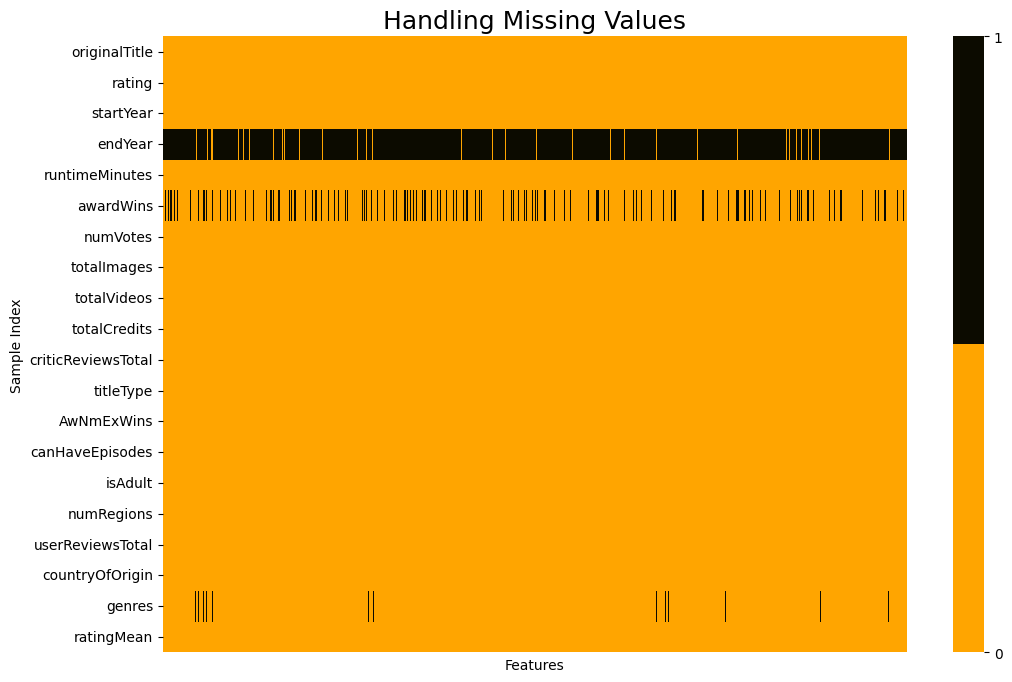

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Crea una mappa dei colori personalizzata con un colore più arancione e nero
from matplotlib.colors import LinearSegmentedColormap

# Definisci i colori
colors = ["#FFA500", "#0c0b00"]  # Nero e un arancione più arancione

# Crea la mappa dei colori
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=2)

# Personalizza la dimensione della figura per la leggibilità
plt.figure(figsize=(12, 8))

# Trasponi il DataFrame per invertire gli assi
sns.heatmap(df_copy.isnull().T, cbar=True, cmap=cmap, cbar_kws={'ticks': [0, 1]})

# Aggiungi titolo e etichette per chiarezza
plt.title("Handling Missing Values", fontsize=18)
plt.xlabel("Features")  # Features sull'asse x ora
plt.ylabel("Sample Index")  # Indice del campione sull'asse y

# Rimuovi i numeri sull'asse delle x
plt.xticks([])

plt.show()

The '\N' values in the variables are replaced with NaN values, so that they can be counted as missing values.

There are:
- 2.618 missing values in the variable 'awardWins'
- 4.852 missing values in the variable 'runtimeMinutes'
- 15.617 missing values in the variable 'endYear'
- 382 missing values in the variable 'genres'

For the missing value from runtimeMinutes substitude them with the average runtime minutes grouped by titleType

In [90]:
def fill_na_with_mean(df_copy, column, group_by):
    df_copy[column] = pd.to_numeric(df_copy[column], errors='coerce')  # Assicura che la colonna sia numerica
    df_copy[column] = df_copy[column].fillna(df_copy.groupby(group_by)[column].transform('mean'))
    return df_copy

# Riempie i valori NaN in 'runtimeMinutes' con la media dei runtime minutes divisi per 'titleType'
df_copy = fill_na_with_mean(df_copy, 'runtimeMinutes', 'titleType')

df_copy['runtimeMinutes']

0         40.332301
1         28.000000
2         92.994200
3         53.573677
4         80.000000
            ...    
16426     92.994200
16427     92.994200
16428    140.000000
16429     92.994200
16430     13.580867
Name: runtimeMinutes, Length: 16431, dtype: float64

In [91]:
# Supponiamo che il DataFrame sia già stato creato e che la colonna runtimeMinutes sia stata convertita in numerico
df_copy['runtimeMinutes'] = pd.to_numeric(df_copy['runtimeMinutes'], errors='coerce')

# Riempire i valori NaN con 0
# df_copy['runtimeMinutes'] = df_copy['runtimeMinutes'].fillna(0)

# Ora convertiamo la colonna in interi
df_copy['runtimeMinutes'] = df_copy['runtimeMinutes'].astype(int)
df_copy['runtimeMinutes']

0         40
1         28
2         92
3         53
4         80
        ... 
16426     92
16427     92
16428    140
16429     92
16430     13
Name: runtimeMinutes, Length: 16431, dtype: int64

### OUTLIERS  
 IQR METHOD 

In questo caso 

In [92]:
# Calcolo dei quartili
Q1 = df['totalCredits'].quantile(0.25)
Q3 = df['totalCredits'].quantile(0.75)

# Calcolo dell'IQR
IQR = Q3 - Q1

# Limiti per gli outliers
limite_inferiore = Q1 - 1.5 * IQR
limite_superiore = Q3 + 1.5 * IQR

# Trova gli outliers
outliers = df[(df['totalCredits'] < limite_inferiore) | (df['totalCredits'] > limite_superiore)]
# Mostra gli outliers
outliers_sorted = outliers.sort_values(by='totalCredits', ascending=False)
print("Outliers rilevati:")
print(outliers_sorted['totalCredits'])

#outliers_sorted.to_csv('outliers_numVotes_sorted.csv', index=False)

#outliers_sorted[['originalTitle','totalCredits']].to_csv('outliers_totalCredits_sorted.csv', index=False)

# Conta quante righe hanno il valore 0
conteggio_valore_0 = (df['totalCredits'] == 0).sum()

print("Numero di righe con valore 0:", conteggio_valore_0)

# Filtrare i dati dove colonna2 ha il valore "A"
filtered_data = df[df['totalCredits'] == 0][['originalTitle','startYear','titleType']]

# Stampare i risultati filtrati
print(filtered_data)

#print("Gli outliers sono stati esportati in outliers.csv")

Outliers rilevati:
7792     15742
4814      4973
4071      4443
12339     4404
7672      3925
         ...  
11331      139
1163       139
5945       139
9836       139
15694      139
Name: totalCredits, Length: 1408, dtype: int64
Numero di righe con valore 0: 117
                                        originalTitle  startYear  titleType
5                                          Lightdance       1995      video
257               Kiel: lancement du 'Fürst-Bismarck'       1898      short
278                                        Strider II       1990  videoGame
360                               Sweet and Sourdough       1968  tvEpisode
460    Apocalipsis: El ascenso de Hitler, la amenaza.       2013      movie
...                                               ...        ...        ...
15165                           Napoleon Blown-Aparte       1966  tvEpisode
15476                                    El año nuevo       1973  tvEpisode
15960                        Panoramic View of Veni

In [122]:
for c in df_copy[['totalCredits', 'userReviewsTotal', 'runtimeMinutes', 'numVotes', 'numRegions', 'criticReviewsTotal', 'awardWins', 'AwNmExWins']].columns:
    # Ordina i dati della variabile 'totalCredits' in ordine decrescente
    df_sorted = df_copy.sort_values(by=c, ascending=False)
    
    # Mostra i dati ordinatiù
    print(df_sorted[c])

7792     15742
4814      4973
4071      4443
12339     4404
7672      3925
         ...  
986          0
1021         0
12334        0
2240         0
2239         0
Name: totalCredits, Length: 16431, dtype: int64
7672     5727
2659     1821
11806    1604
988      1418
4192     1224
         ... 
6451        0
27          0
28          0
29          0
14377       0
Name: userReviewsTotal, Length: 16431, dtype: int64
13997    3000
1280     1290
1098      600
6333      570
5998      540
         ... 
13510       1
6132        1
2483        1
19          1
9240        0
Name: runtimeMinutes, Length: 16431, dtype: int64
3655     966565
988      825934
1694     803146
15166    737343
4192     612009
          ...  
112           5
144           5
164           5
201           5
16414         5
Name: numVotes, Length: 16431, dtype: int64
988      69
11410    62
3655     60
7241     58
4209     57
         ..
25        1
24        1
5702      1
21        1
16383     1
Name: numRegions, Length:

totalCredits, userReviewsTotal, userReviewsTotal, runtimeMinutes

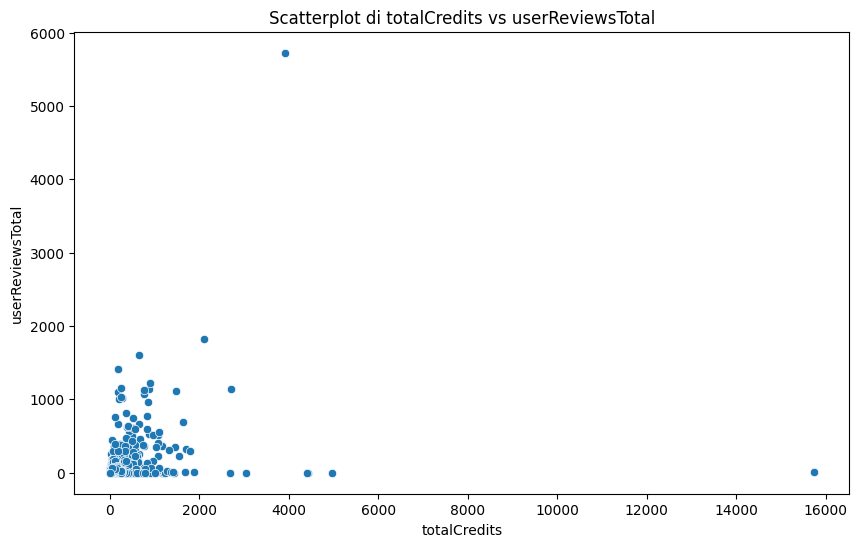

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='totalCredits', y='userReviewsTotal')
plt.title('Scatterplot di totalCredits vs userReviewsTotal')
plt.xlabel('totalCredits')
plt.ylabel('userReviewsTotal')
plt.show()

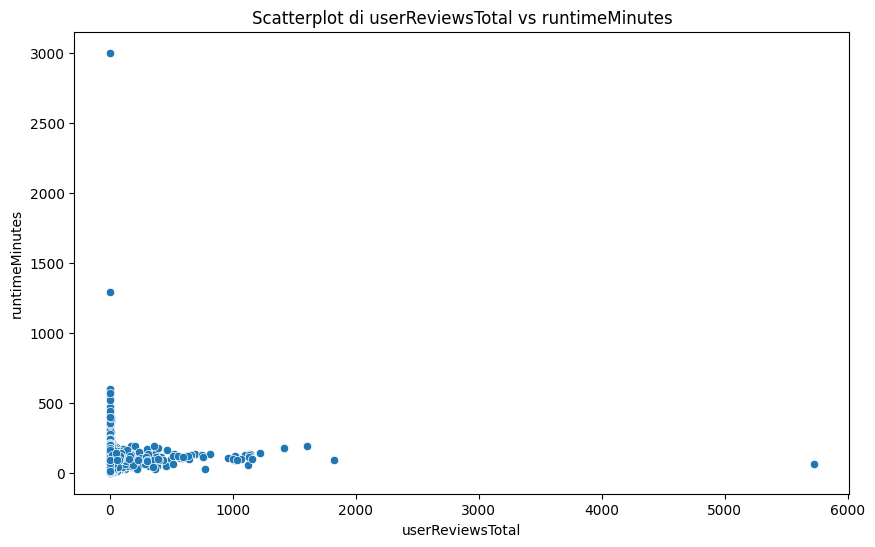

In [138]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='userReviewsTotal', y='runtimeMinutes')
plt.title('Scatterplot di userReviewsTotal vs runtimeMinutes')
plt.xlabel('userReviewsTotal')
plt.ylabel('runtimeMinutes')
plt.show()

### Wrong Data

C:\Users\Lavigi\AppData\Local\Temp\ipykernel_11908\3182956626.py:14: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



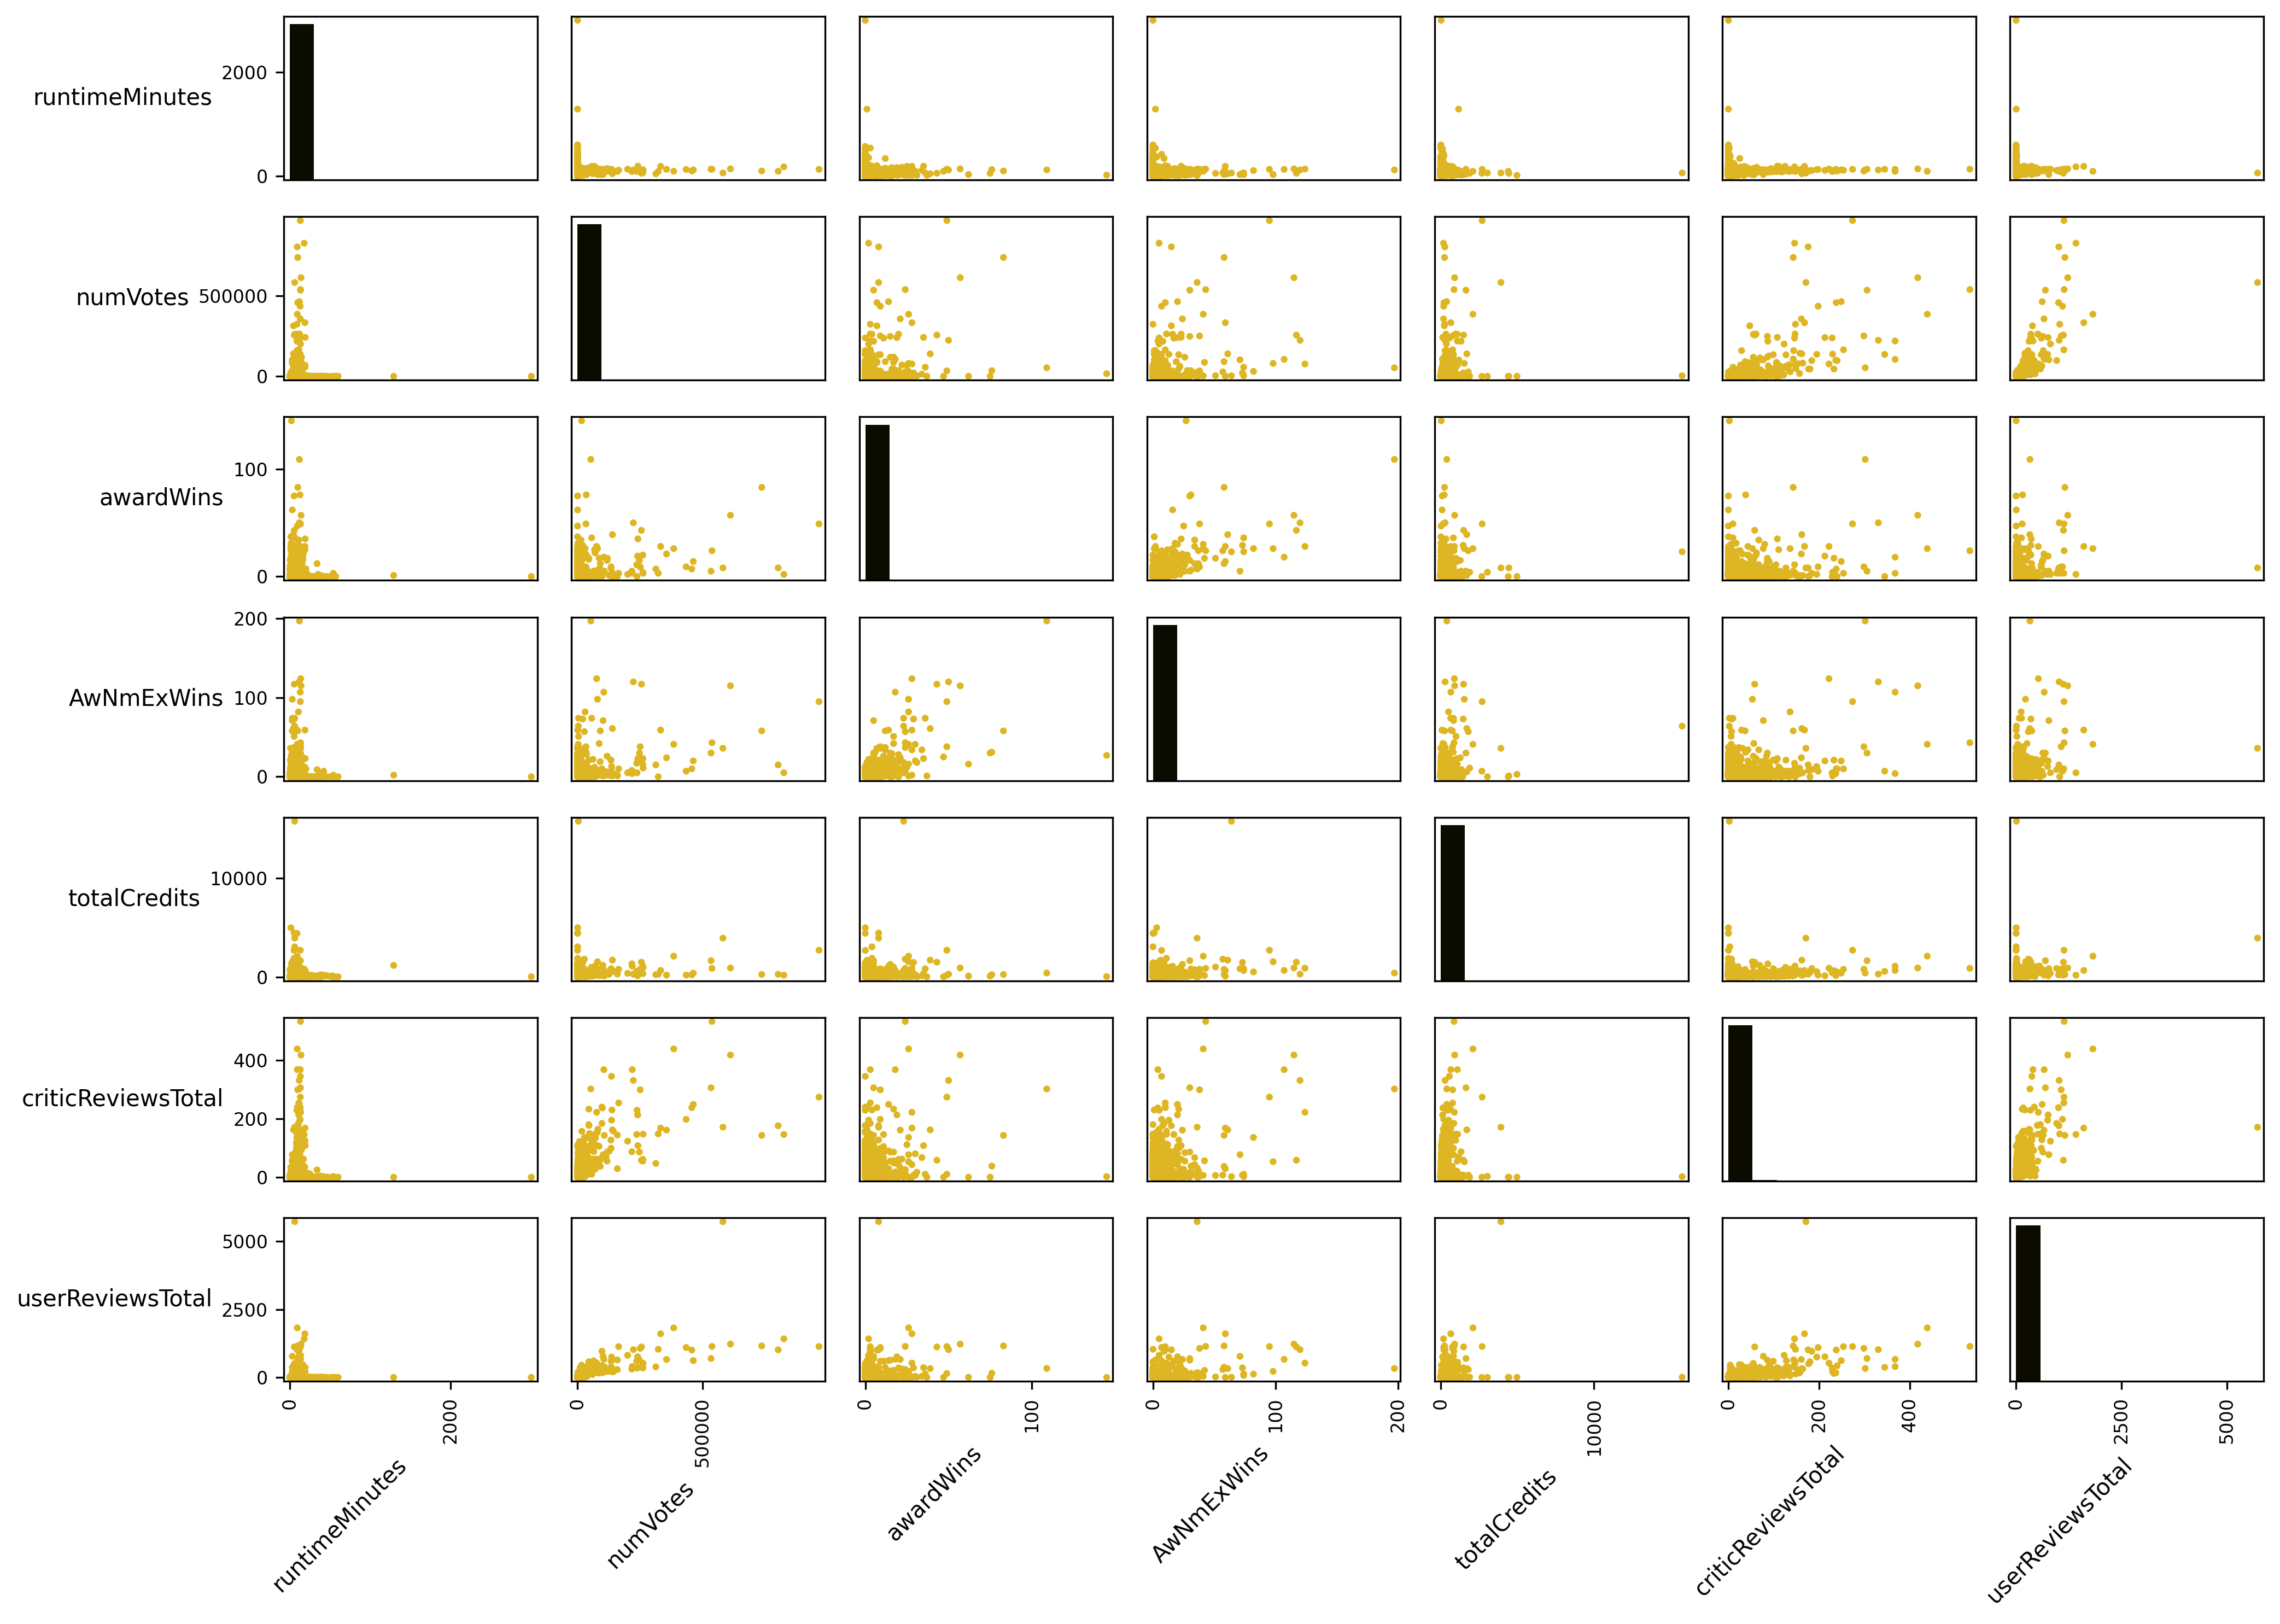

In [96]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Seleziona le colonne rilevanti per la scatter matrix
columns = ['runtimeMinutes', 'numVotes', 'awardWins', 'AwNmExWins', 
           'totalCredits', 'criticReviewsTotal', 'userReviewsTotal']

# Crea la scatter matrix
fig, ax = plt.subplots(figsize=(14, 10), dpi=300)

# Genera la scatter matrix e salva i subplots negli assi
scatter = scatter_matrix(df_copy[columns], alpha=1, figsize=(14, 10), diagonal='hist', color='#deb522', ax=ax)

# Imposta il colore per i grafici diagonali
for i in range(len(columns)):
    scatter[i, i].hist(df_copy[columns[i]], color='#0c0b00')  # Colore desiderato

# Allinea le etichette delle variabili sugli assi
for i, ax in enumerate(scatter[:, 0]):  # Etichette sull'asse y
    ax.set_ylabel(columns[i], rotation=0, ha='right', va='center', fontsize=10)

for j, ax in enumerate(scatter[-1, :]):  # Etichette sull'asse x
    ax.set_xlabel(columns[j], rotation=45, ha='right', fontsize=10)

# Aggiorna il layout per evitare sovrapposizioni
plt.tight_layout()
plt.show()


From this scatter matrix can be seen the most interesting graphs for the research of outliers.

## Variable transformations
 • Is it better to use for further modules transformed variables (e.g., log-transformated)?

The ratings are given as a range (ten equally spaced intervals from one to ten). They have therefore been replaced with the mean of the range.

In [97]:
#function to calculate the interval mean
def interval_mean(value):
# Rimuove i caratteri '[' e ')' e divide usando ','
    estremi = value.replace('(', '').replace(']', '').split(',')
    minimo = float(estremi[0])
    massimo = float(estremi[1])
    # Calcola e restituisce la media
    return (minimo + massimo) / 2

# Applica la funzione alla colonna 'Intervallo' per ottenere la media
df_copy['ratingMean'] = df_copy['rating'].apply(interval_mean)

In [98]:
# export data

df_copy.to_csv('train_cleaned_v.1.csv', index=False)

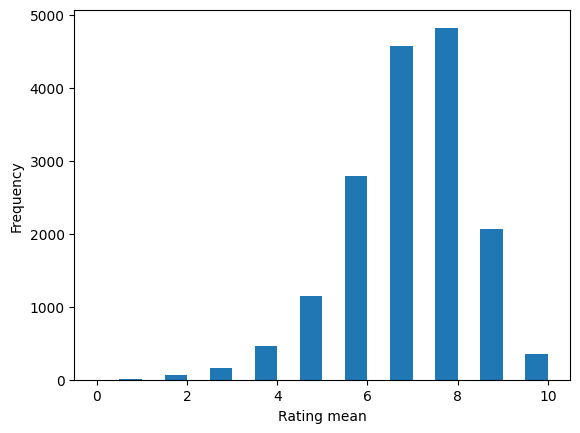

In [99]:
# Creare bin di larghezza bin_width
bin_width = 0.5
bins = np.arange(0, 10 + bin_width, bin_width)

plt.hist(df_copy['ratingMean'], bins = bins)
plt.xlabel('Rating mean')
plt.ylabel('Frequency')
plt.show()

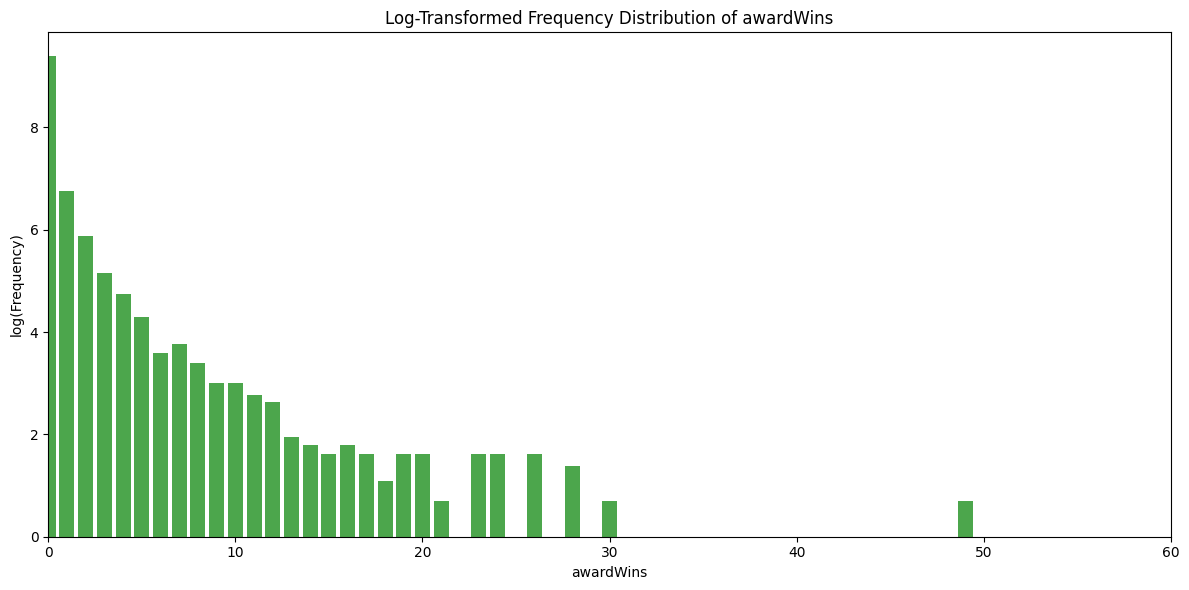

In [100]:
# Calculate the frequency of each awardWins value
frequency = df_copy['awardWins'].value_counts().sort_index()

# Apply logarithmic transformation to the frequency (adding a small constant to avoid log(0))
log_frequency = np.log(frequency + 1e-9)

# Plot the log-transformed frequency distribution
plt.figure(figsize=(12, 6))

# Log-transformed frequency distribution
plt.bar(log_frequency.index, log_frequency.values, color='green', alpha=0.7)
plt.title('Log-Transformed Frequency Distribution of awardWins')
plt.xlabel('awardWins')
plt.ylabel('log(Frequency)')
plt.xlim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()

## Pairwise correlations and eventual elimination of variables
 • Matrix correlation (analyse high correlated variables)

In [101]:
df_copy['numVotes'].corr(df_copy['ratingCount'])

np.float64(0.9999999334405579)

The two variables 'numVotes' and 'ratingCount' represent the same attribute, so we can eliminate one of them.

In [102]:
del df_copy['ratingCount']

In [103]:
df_copy['isRatable'].value_counts()

isRatable
True    16431
Name: count, dtype: int64

In [104]:
df_copy['worstRating'].value_counts()

worstRating
1    16431
Name: count, dtype: int64

In [105]:
df_copy['bestRating'].value_counts()

bestRating
10    16431
Name: count, dtype: int64

'isRatable', 'worstRating' and 'bestRating' are attributes with all the same values for every object in the dataframe, so they are useless for our analysis.

In [106]:
del df_copy['isRatable']

In [107]:
del df_copy['worstRating']

In [108]:
del df_copy['bestRating']

In [109]:
#vedete voi poi se è meglio questa o quella sotto di matrice
import jinja2 as tommasofumaganja
df_copy.corr(numeric_only = True, method="pearson").style.background_gradient(cmap='Blues', vmin=-1, vmax=1)

ModuleNotFoundError: No module named 'jinja2'

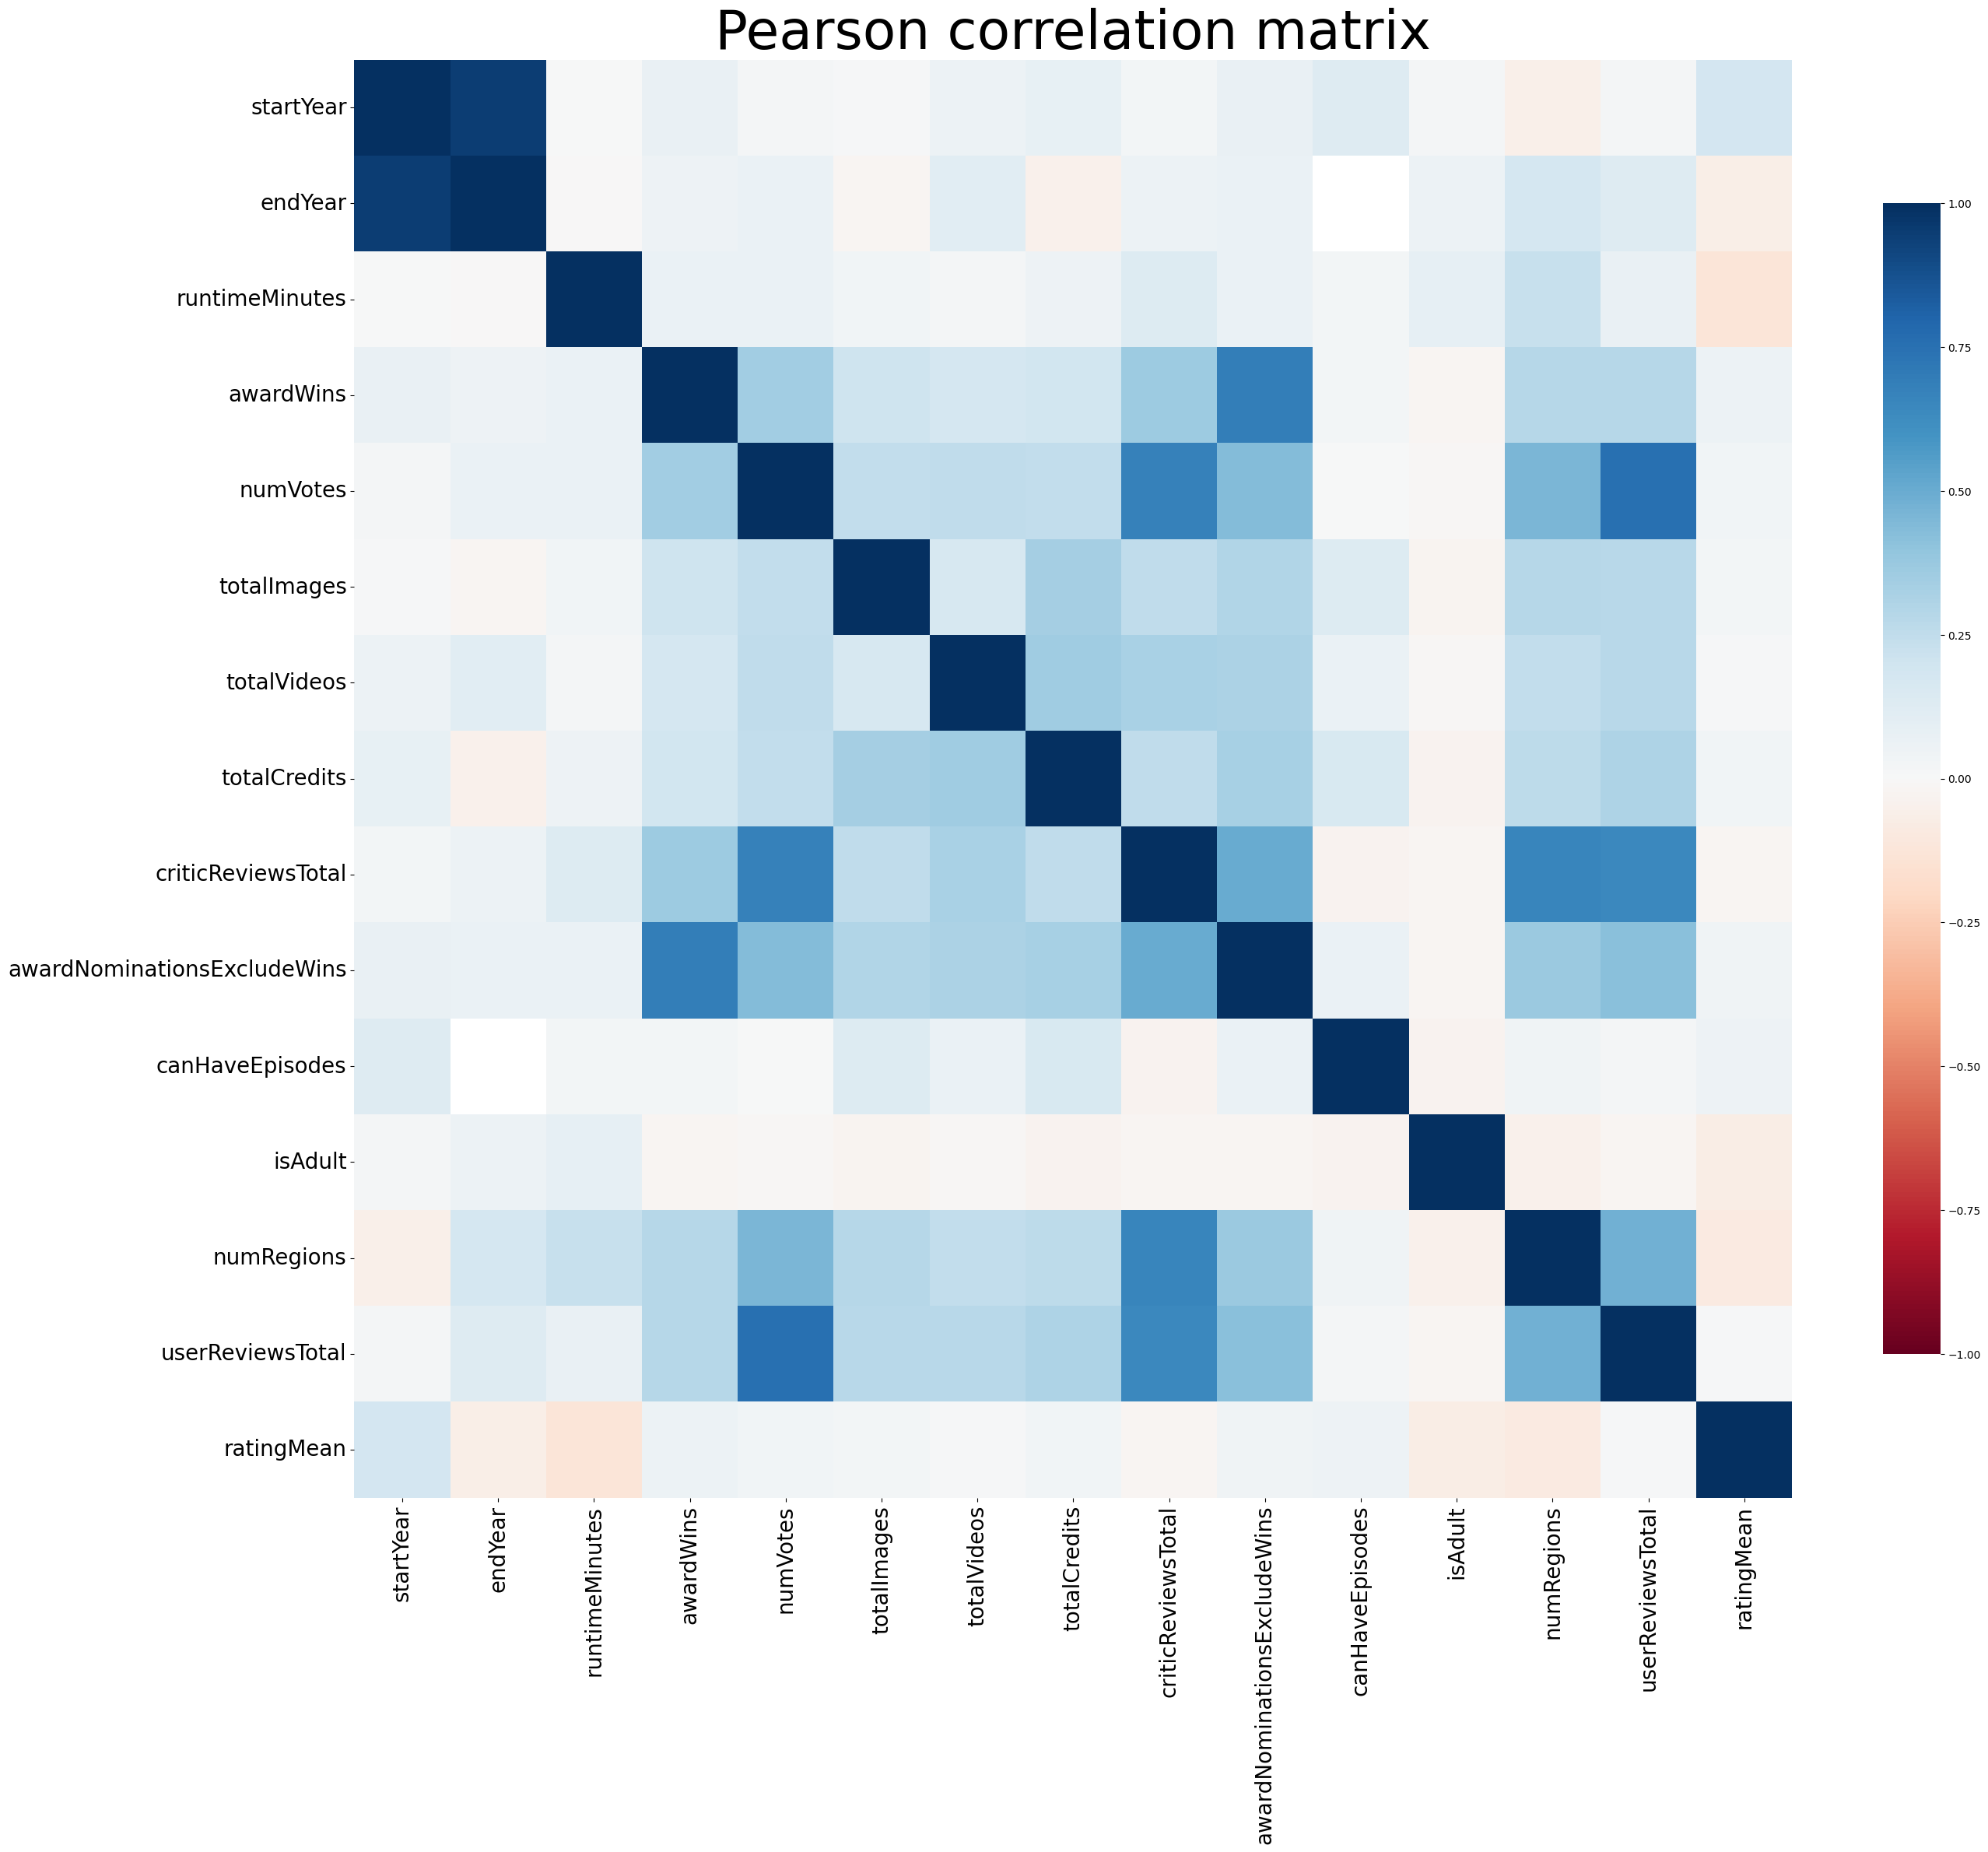

In [ ]:

# Compute the correlation matrix
correlation_matrix = df_copy.corr(numeric_only = True, method="pearson")

# Set up the matplotlib figure
plt.figure(figsize=(30, 24))

# Draw the heatmap with a color bar, using a custom colormap that makes zero values white
sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', square=True, 
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1, center=0)

# Add a title
plt.title('Pearson correlation matrix', fontsize = 50)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=20, rotation=0) 

# Display the plot
plt.show()


In [ ]:
differenze = df[df['numVotes'] != df['ratingCount']]

# Calcola la differenza tra le colonne per ogni riga e mostralo
for idx, row in differenze.iterrows():
    print(f"Riga {idx}: numVotes = {row['numVotes']}, ratingCount = {row['ratingCount']}, differenza = {row['ratingCount'] - row['numVotes']}")

# Calcola la media delle differenze
differenze = df['ratingCount'] - df['numVotes']
media_differenze = differenze.mean()

# Mostra il risultato
print(f"\n La media delle differenze è: {media_differenze}")

# Conta il numero di righe in cui le differenze sono diverse da 0
differenze_diverse = (differenze != 0).sum()

print(f"\n Numero di righe con valori diversi: {differenze_diverse}")

# Calcola la differenza percentuale tra le due colonne (rispetto a colonna1)
percentuali_differenza = ((df['ratingCount'] - df['numVotes']) / df['ratingCount']) * 100

# Calcola la media della differenza percentuale
media_percentuale_differenza = percentuali_differenza.mean()

# Mostra il risultato
print(f"La media della differenza percentuale è: {media_percentuale_differenza}%")


# Calcolare la correlazione tra colonna1 e colonna2
correlazione_rc_nv = df['ratingCount'].corr(df['numVotes'])

# Stampare il risultato
print(f"Correlazione tra ratingCount e numVotes: {correlazione_rc_nv}")


Riga 0: numVotes = 779, ratingCount = 781, differenza = 2
Riga 4: numVotes = 15718, ratingCount = 15746, differenza = 28
Riga 15: numVotes = 4568, ratingCount = 4570, differenza = 2
Riga 20: numVotes = 19746, ratingCount = 19758, differenza = 12
Riga 22: numVotes = 34144, ratingCount = 34175, differenza = 31
Riga 28: numVotes = 21, ratingCount = 22, differenza = 1
Riga 60: numVotes = 409, ratingCount = 408, differenza = -1
Riga 62: numVotes = 58, ratingCount = 59, differenza = 1
Riga 67: numVotes = 1019, ratingCount = 1021, differenza = 2
Riga 85: numVotes = 3644, ratingCount = 3645, differenza = 1
Riga 99: numVotes = 61747, ratingCount = 61851, differenza = 104
Riga 116: numVotes = 4191, ratingCount = 4194, differenza = 3
Riga 117: numVotes = 4138, ratingCount = 4146, differenza = 8
Riga 122: numVotes = 2862, ratingCount = 2865, differenza = 3
Riga 134: numVotes = 678, ratingCount = 680, differenza = 2
Riga 147: numVotes = 3195, ratingCount = 3203, differenza = 8
Riga 148: numVotes = 

From this matrix it can be seen the correlation between each numeric variable in the dataset using the Pearson correlation method.

In [ ]:
import seaborn as sns
# Se il DataFrame è molto grande, campiona un sottoinsieme più gestibile
# Imposta la dimensione del campione a un valore che il tuo sistema possa gestire, ad esempio 5 righe
df_no_boolean = df_copy.loc[~(df_copy['isAdult'] | df_copy['canHaveEpisodes'])]

df_no_boolean = df_no_boolean.drop(['isAdult', 'canHaveEpisodes'], axis=1)

df_sampled = df_no_boolean.corr(numeric_only = True, method="spearman")

plt.figure(figsize=(50, 44), dpi= 300)
sns.heatmap(df_sampled, annot=True, cmap='Reds', cbar=True, annot_kws={"size": 40})

plt.title('Distance Matrix Heatmap', fontsize = 70)
plt.xticks(fontsize=30, rotation = 90)
plt.yticks(fontsize=30, rotation = 0)


# Show the plot
plt.show()

In [ ]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='awardWins', y='userReviewsTotal', title='Scatter Plot of Award Wins vs User Reviews Total')

# Mostra il grafico
fig.show()

In [ ]:
pr_urt_max = df_copy['originalTitle'].loc[df_copy['userReviewsTotal'] == 5727]
se_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 145]
tr_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 109]
qr_aw_max = df_copy['originalTitle'].loc[df_copy['awardWins'] == 83]
se_aw_max, pr_urt_max, tr_aw_max, qr_aw_max

(551    No War
 Name: originalTitle, dtype: object,
 7672    The Witcher
 Name: originalTitle, dtype: object,
 1668    If Beale Street Could Talk
 Name: originalTitle, dtype: object,
 15166    Fargo
 Name: originalTitle, dtype: object)

In [ ]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='startYear', y='awardWins', title='Scatter Plot of Award Wins vs Start Year')

# Mostra il grafico
fig.show()

In [ ]:
# Crea uno scatter plot usando Plotly
fig = px.scatter(df_copy, x='runtimeMinutes', y='awardWins', title='Scatter Plot of Award Wins vs runtimeMinutes', color = 'titleType')

# Mostra il grafico
fig.show()

In [ ]:
df_copy['reviewsTotal'] = df_copy['userReviewsTotal'] + df_copy['criticReviewsTotal']

In [ ]:
df_copy['awardNominations'] = df_copy['awardWins'] + df_copy['awardNominationsExcludeWins']

In [ ]:
#STURGE'S RULE

def sturges_rule(df_copy, column_name):
    n = df_copy[column_name].dropna().shape[0]  # Conta il numero di valori non NaN nella colonna
    k = 1 + np.log2(n)
    return int(np.ceil(k))

sturges = sturges_rule(df_copy, 'awardWins')

Idea

- Possiamo distinguere le /N in endYear dei film e le /N delle serie tv non concluse (o degli episodi tv).